In [1]:
import sys
sys.path.append("..")

from src import MaxmindIp
from helpers import function_time


TOTAL_TIME = 7*60*60
SECTION_TIME = int(TOTAL_TIME / 3)
SEARCH_TIME = int(SECTION_TIME / 4)
print(TOTAL_TIME, SECTION_TIME, SEARCH_TIME)

25200 8400 2100


In [2]:
ip = '3.235.47.177'
password = 'i-0f0363fb46c3cf5c0'

In [3]:
permutations = {'trial_1': {'model_type': 'AutoML', 'cost_matrix_loss_metric': False},
                'trial_2': {'model_type': 'GradientBoosting', 'cost_matrix_loss_metric': False},
                'trial_3': {'model_type': 'GradientBoosting', 'cost_matrix_loss_metric': True}}

In [4]:
'''
trial = permutations['trial_1']
print(trial)

maxmind = MaxmindIp(ip=ip,
                    username='h2o',
                    password=password,
                    port=54321)
maxmind.config['step'] = 90
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=60*2,
                     evaluate=True)

volume_based_config = maxmind.configure_volume_equals_baseline(search_time=-1)
'''

"\ntrial = permutations['trial_1']\nprint(trial)\n\nmaxmind = MaxmindIp(ip=ip,\n                    username='h2o',\n                    password=password,\n                    port=54321)\nmaxmind.config['step'] = 90\ndata = maxmind.train(reset_lookback=False,\n                     reset_step=False,\n                     sample_size=None,\n                     model_type=trial['model_type'],\n                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],\n                     search_time=60*2,\n                     evaluate=True)\n\nvolume_based_config = maxmind.configure_volume_equals_baseline(search_time=-1)\n"

In [5]:
volume_based_config = {'cost_tp': 0, 'cost_fp': -60, 'cost_tn': 0.1, 'cost_fn': -213.3333333333333}

{'model_type': 'AutoML', 'cost_matrix_loss_metric': False}


/Users/kerrirapes/Documents/Projects/sendwave/analysis/email_maxmind/emaxmind/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


data available: 14628772
data length: 11827159
Checking whether there is an H2O instance running at http://3.235.47.177:54321 . connected.


H2O_cluster_uptime:,53 mins 00 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,6 days
H2O_cluster_name:,root
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,45.73 Gb
H2O_cluster_total_cores:,36
H2O_cluster_allowed_cores:,36
H2O_cluster_status:,"locked, healthy"


Date: 2020-05-28 00:00:00       Lookback: 270   Step: 90
Parse progress: |█████████████████████████████████████████████████████████| 100%


INFO:root:Training AutoML


AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
optimum_threshold: 0.17
Could not find exact threshold 0.17; using closest threshold found 0.16994531341092728.

Confusion Matrix (Act/Pred) @ threshold = 0.16994531341092728: 


,,0,1,Error,Rate
0,0,9293.0,265.0,0.0277,(265.0/9558.0)
1,1,315.0,140.0,0.6923,(315.0/455.0)
2,Total,9608.0,405.0,0.0579,(580.0/10013.0)



Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
The modified system has an impact of -2650568.03
new_approach: -41595991.06666662  -  today: -38945423.033333346
Date: 2020-08-26 00:00:00       Lookback: 270   Step: 90
Parse progress: |█████████████████████████████████████████████████████████| 100%


INFO:root:Training AutoML


AutoML progress: |████████████████████████████████████████████████████████| 100%


ChunkedEncodingError: ('Connection broken: IncompleteRead(2707 bytes read, 7533 more expected)', IncompleteRead(2707 bytes read, 7533 more expected))

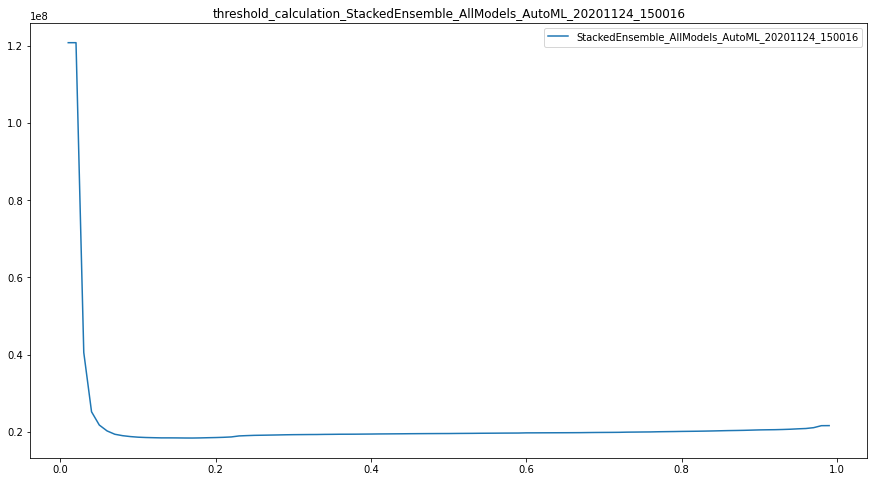

In [6]:
trial = permutations['trial_1']
print(trial)

maxmind = MaxmindIp(ip=ip,
                    username='h2o',
                    password=password,
                    port=54321)
maxmind.config['costs'] = volume_based_config
maxmind.config['step'] = 90
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=SEARCH_TIME,
                     evaluate=True)


In [ ]:
maxmind.plot_vs_baseline()

In [ ]:
maxmind.stats_volume_vs_baseline()

In [ ]:
maxmind.stats_fp_vs_baseline()

In [ ]:
maxmind.stats_tp_vs_baseline()

In [ ]:
permutations['trial_1']['impact'] = maxmind.cost_impact()

In [ ]:
trial = permutations['trial_2']
print(trial)

maxmind = MaxmindIp(ip=ip,
                    username='h2o',
                    password=password,
                    port=54321)
maxmind.config['step'] = 90
maxmind.config = volume_based_config
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=SEARCH_TIME,
                     evaluate=True)

In [ ]:
maxmind.plot_vs_baseline()

In [ ]:
maxmind.stats_volume_vs_baseline()

In [ ]:
maxmind.stats_fp_vs_baseline()

In [ ]:
maxmind.stats_tp_vs_baseline()

In [ ]:
permutations['trial_2']['impact'] = maxmind.cost_impact()

In [ ]:
trial = permutations['trial_3']
print(trial)

maxmind = MaxmindIp(ip=ip,
                    username='h2o',
                    password=password,
                    port=54321)
maxmind.config['step'] = 90
maxmind.config = volume_based_config
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=SEARCH_TIME,
                     evaluate=True)

In [ ]:
maxmind.plot_vs_baseline()

In [ ]:
maxmind.stats_volume_vs_baseline()

In [ ]:
maxmind.stats_fp_vs_baseline()

In [ ]:
maxmind.stats_tp_vs_baseline()

In [ ]:
permutations['trial_3']['impact'] = maxmind.cost_impact()